# Import the Libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and Cleaning the Data

In [37]:
df=pd.read_csv(r"\Users\LENOVO\Downloads\dataframe_.csv")

In [38]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [39]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [41]:
df.dropna(inplace=True)

In [42]:
df=df.reset_index()

In [43]:
df.drop('index',axis=1,inplace=True)

In [44]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [46]:
df.dtypes

input     float64
output    float64
dtype: object

In [47]:
df.duplicated().sum()

606

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.duplicated().sum()

0

In [50]:
df.dtypes

input     float64
output    float64
dtype: object

In [51]:
df.shape

(1090, 2)

In [52]:
df.describe

<bound method NDFrame.describe of            input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1105 -112.018496  121.096397
1107 -119.954237  123.609122
1108 -109.942155  127.197394
1109 -111.515368  128.170885
1110 -110.344221  123.087950

[1090 rows x 2 columns]>

# Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


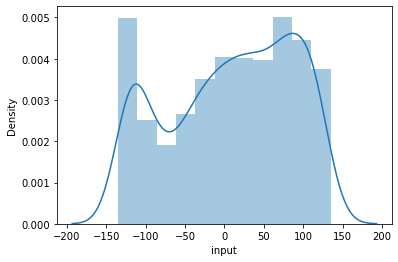

In [53]:
#distributionplot
sns.distplot(df.input)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


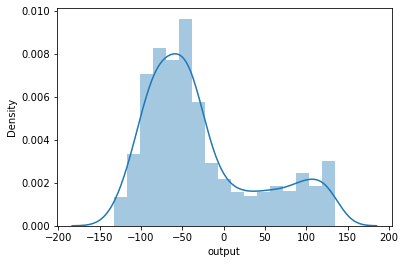

In [54]:
#distributionplot
sns.distplot(df.output)
plt.show()

### Here we can clearly observe that the output is right skewwed and outliers are less identified.

<AxesSubplot:>

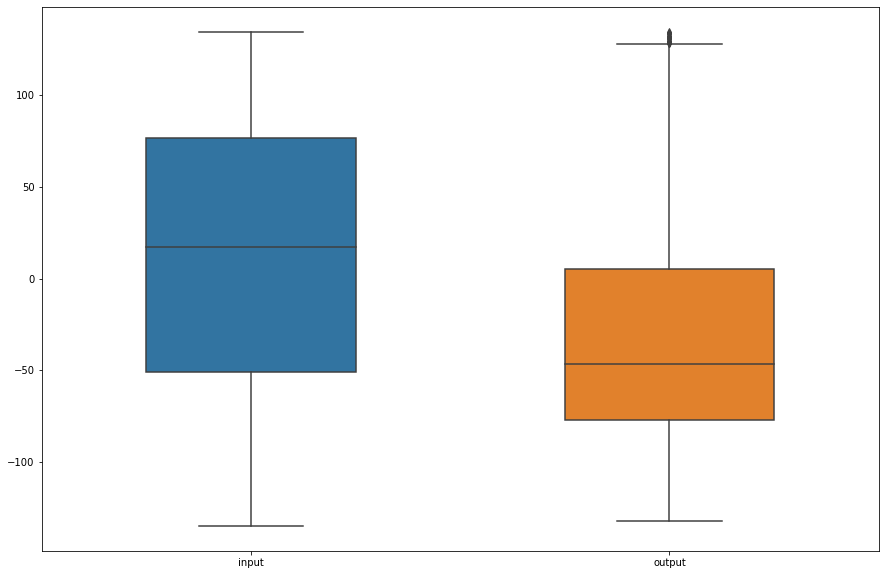

In [55]:
plt.figure(figsize=(15,10))
box_data = df #variable representing the data array
box_target = df.output #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)

### Here the output having the little variance when comparing with input.

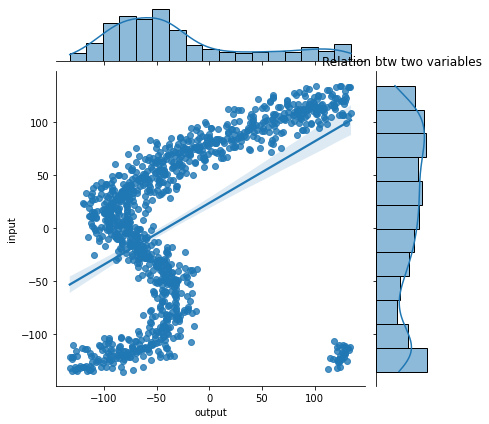

In [56]:
#JointPlot
sns.jointplot(x='output',y='input',data=df,kind='reg')
plt.title("Relation btw two variables")
plt.show()

### When comparing the both variables we are clearly observe that the line shows the low to high variance of the variables.


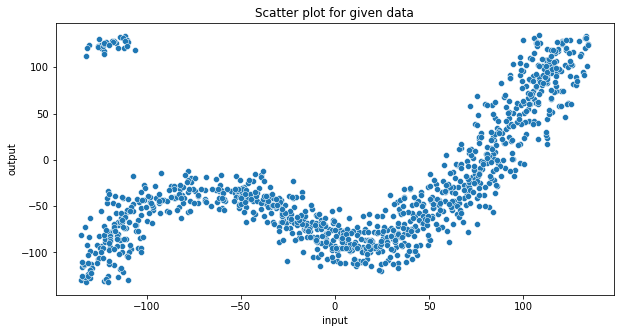

In [57]:
#ScatterPlot
plt.figure(figsize=(10,5))
sns.scatterplot(x='input',y='output',data=df,)
plt.title("Scatter plot for given data")
plt.show()

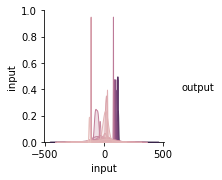

In [58]:
sns.pairplot(df,hue='output') #PAIR PLOT IS USED ONLY TO THE FEW NUMERICALS VALUES ARE TO BE ANALYSED
plt.show()

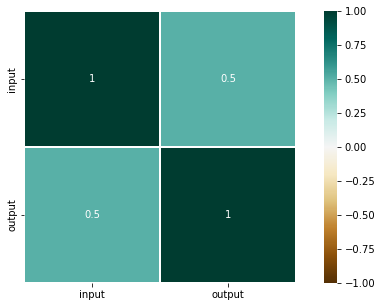

In [59]:
#Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG",linewidths=0.01,square=True)
plt.show()

# Machine Learning Problem

In [60]:
df.columns

Index(['input', 'output'], dtype='object')

In [61]:
df = df[['input', 'output']]

In [62]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


# Data Preparation

In [63]:
# Identifying the inputs (X) and output (y)
y = df['output']   #Target Variable00

X = df[['input']]

In [64]:
y.head()

0   -130.572085
1   -129.938929
2   -130.141832
3   -125.760932
4   -112.785214
Name: output, dtype: float64

In [65]:
X.head()

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781


In [66]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [67]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(817, 1) (817,)
(273, 1) (273,)


In [68]:
# Standarizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit transform converts the dataframe to numpy array
X_train_transformed=scaler.fit_transform(X_train)
print(X_train_transformed.shape)

(817, 1)


In [69]:
X_test_transformed=scaler.transform(X_test)
print(X_test_transformed.shape)

(273, 1)


In [70]:
type(X_train_transformed)

numpy.ndarray

In [71]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_test.columns)  # to convert numpy array into dataframe.
X_train_transformed

,input
0,0.359194
1,-1.366540
2,1.396285
3,-0.837132
4,0.700214
...,...
812,-1.585131
813,-1.490938
814,1.515627
815,-1.146227


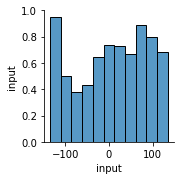

In [72]:
sns.pairplot(X_train)

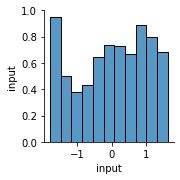

In [73]:
sns.pairplot(X_train_transformed)

In [74]:
type(X_train_transformed)

pandas.core.frame.DataFrame

In [75]:
X_train.columns

Index(['input'], dtype='object')

In [76]:
X_train_transformed.describe()

,input
count,8.170000e+02
mean,1.603504e-17
std,1.000613e+00
min,-1.768391e+00
25%,-8.371321e-01
50%,1.100474e-01
75%,8.741984e-01
max,1.616509e+00


# Training, Predicting and Evaluating the Linear Regression

In [79]:
%%time
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 15.6 ms
Wall time: 172 ms


LinearRegression()

In [80]:
y_test_pred = regressor.predict(X_test_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [81]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-53.529467
569,-48.791046,-2.627007
156,-49.286316,-54.578826
677,-71.964687,-33.920625
681,-58.051427,-44.211159


<AxesSubplot:xlabel='output', ylabel='Count'>

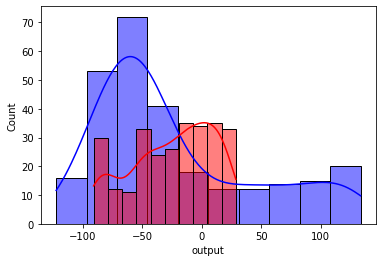

In [82]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

In [83]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  45.460327155731584
Mean Squared Error:  3681.6220179349134
Root Mean Squared Error:  60.67637116650034


# KNN Regressor

In [84]:
%%time
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 0 ns
Wall time: 108 ms


KNeighborsRegressor()

In [85]:
y_test_pred = regressor.predict(X_test_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [86]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-37.934556
569,-48.791046,-21.896591
156,-49.286316,-34.475497
677,-71.964687,-80.415123
681,-58.051427,-64.644252


<AxesSubplot:xlabel='output', ylabel='Count'>

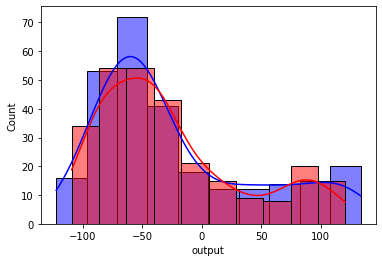

In [87]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

In [88]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  24.350031122198533
Mean Squared Error:  1780.6336793107866
Root Mean Squared Error:  42.19755537126276


# SV Regressor

In [89]:
%%time
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

CPU times: total: 31.2 ms
Wall time: 61 ms


SVR()

In [90]:
y_test_pred = regressor.predict(X_test_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [91]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-45.525712
569,-48.791046,-27.897249
156,-49.286316,-44.502105
677,-71.964687,-75.055083
681,-58.051427,-58.802778


<AxesSubplot:xlabel='output', ylabel='Count'>

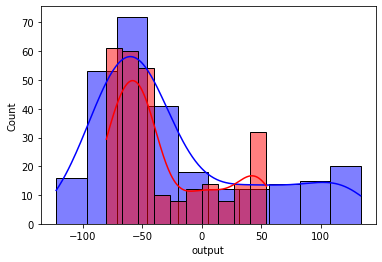

In [92]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

In [93]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  25.352376056280022
Mean Squared Error:  1844.0132389603016
Root Mean Squared Error:  42.94197525685447


# Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [95]:
y_test_pred = regressor.predict(X_test_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [96]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-30.650036
569,-48.791046,-29.414907
156,-49.286316,-43.187039
677,-71.964687,-73.363737
681,-58.051427,-64.688905


<AxesSubplot:xlabel='output', ylabel='Count'>

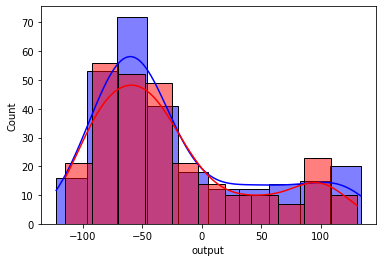

In [97]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

In [98]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  26.87572559221388
Mean Squared Error:  2244.4808375727084
Root Mean Squared Error:  47.37595210201805


# Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [100]:
y_test_pred = regressor.predict(X_test_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [101]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-29.370224
569,-48.791046,-36.000000
156,-49.286316,-47.370867
677,-71.964687,-62.306029
681,-58.051427,-66.677175


<AxesSubplot:xlabel='output', ylabel='Count'>

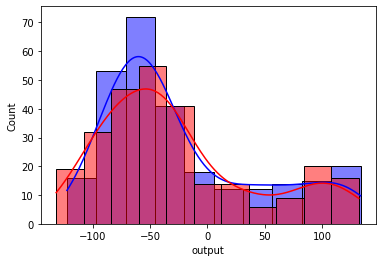

In [102]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

In [103]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  30.12076586482173
Mean Squared Error:  2824.0583271696164
Root Mean Squared Error:  53.14186981250863


# GBDT Regressor

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
GBDT_regression = GradientBoostingRegressor()
GBDT_regression.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [110]:
y_test_pred = regressor.predict(X_test_transformed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [111]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
117,-43.547685,-29.370224
569,-48.791046,-36.000000
156,-49.286316,-47.370867
677,-71.964687,-62.306029
681,-58.051427,-66.677175


<AxesSubplot:xlabel='output', ylabel='Count'>

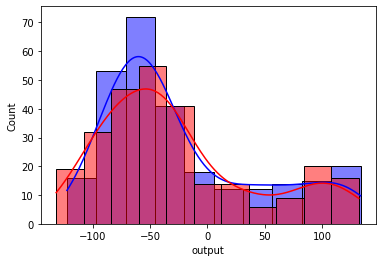

In [112]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

In [113]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  30.12076586482173
Mean Squared Error:  2824.0583271696164
Root Mean Squared Error:  53.14186981250863


### - KNN Regressor is the best model and it gives the least mean error value.

# Hyperparameter TUning

In [114]:
# Identifying the inputs (X) and output (y)
y = df['output']   #Target Variable00

X = df[['input']]

In [115]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# KNN Regressor

In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

train_scores,test_scores = list(),list()

values = [i for i in range(1,21)]

for i in values:
    model = KNeighborsRegressor(n_neighbors=i)
    
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    train_score = metrics.mean_absolute_error(y_train,y_train_pred)
    train_scores.append(train_score)
    
    
    y_test_pred = model.predict(X_test)
    test_score = metrics.mean_absolute_error(y_test,y_test_pred)
    test_scores.append(test_score)
    
    print('> %d,train: %.3f, test: %.3f' % (i,train_score,test_score))

> 1,train: 1.010, test: 28.553
> 2,train: 15.430, test: 27.231
> 3,train: 18.688, test: 25.852
> 4,train: 19.991, test: 25.316
> 5,train: 20.428, test: 24.377
> 6,train: 21.002, test: 24.496
> 7,train: 21.322, test: 24.278
> 8,train: 21.310, test: 23.298
> 9,train: 21.669, test: 23.075
> 10,train: 21.767, test: 23.197
> 11,train: 22.022, test: 22.883
> 12,train: 22.175, test: 22.614
> 13,train: 22.333, test: 22.523
> 14,train: 22.171, test: 22.441
> 15,train: 22.091, test: 22.245
> 16,train: 22.029, test: 22.419
> 17,train: 22.102, test: 22.382
> 18,train: 22.099, test: 22.646
> 19,train: 22.133, test: 22.773
> 20,train: 22.102, test: 22.675


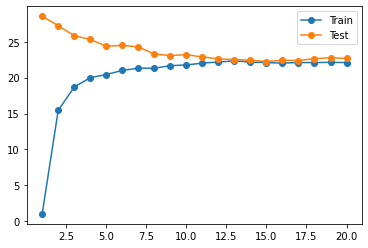

In [118]:
#plot of train and test scores vs tree depth
plt.plot(values,train_scores, '-o',label='Train')
plt.plot(values,test_scores,'-o', label='Test')
plt.legend()
plt.show()

# Decision Tree Regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

train_scores,test_scores = list(),list()

values = [i for i in range(1,21)]

for i in values:
    model = DecisionTreeRegressor(max_depth=i)
    
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    train_score = metrics.mean_absolute_error(y_train,y_train_pred)
    train_scores.append(train_score)
    
    
    y_test_pred = model.predict(X_test)
    test_score = metrics.mean_absolute_error(y_test,y_test_pred)
    test_scores.append(test_score)
    
    print('> %d,train: %.3f, test: %.3f' % (i,train_score,test_score))

> 1,train: 33.313, test: 30.401
> 2,train: 28.060, test: 26.802
> 3,train: 24.860, test: 24.143
> 4,train: 22.676, test: 22.828
> 5,train: 21.053, test: 23.325
> 6,train: 18.961, test: 23.536
> 7,train: 17.657, test: 24.568
> 8,train: 14.997, test: 24.699
> 9,train: 13.163, test: 24.872
> 10,train: 11.653, test: 25.877
> 11,train: 9.606, test: 25.850
> 12,train: 7.940, test: 26.611
> 13,train: 6.290, test: 27.082
> 14,train: 5.381, test: 26.982
> 15,train: 4.249, test: 27.335
> 16,train: 3.509, test: 27.733
> 17,train: 2.567, test: 27.760
> 18,train: 2.054, test: 28.008
> 19,train: 1.780, test: 28.364
> 20,train: 1.702, test: 28.326


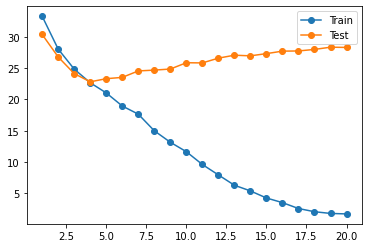

In [123]:
#plot of train and test scores vs tree depth
plt.plot(values,train_scores, '-o',label='Train')
plt.plot(values,test_scores,'-o', label='Test')
plt.legend()
plt.show()

# Feature Engineering

In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(df[['input']])
X_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04,
        -1.84912147e+06],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04,
        -1.79500520e+06],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04,
        -2.45584080e+06],
       ...,
       [ 1.00000000e+00, -1.09942155e+02,  1.20872774e+04,
        -1.32890132e+06],
       [ 1.00000000e+00, -1.11515368e+02,  1.24356774e+04,
        -1.38676915e+06],
       [ 1.00000000e+00, -1.10344221e+02,  1.21758472e+04,
        -1.34353438e+06]])

In [131]:
transformed_df = pd.DataFrame(X_poly,columns=['input1','input2','input3','input4'])
transformed_df['output']=df['output']
transformed_df.head()

,input1,input2,input3,input4,output
0,1.0,-122.740667,15065.271434,-1.849121e+06,-130.572085
1,1.0,-121.531419,14769.885901,-1.795005e+06,-129.938929
2,1.0,-134.917019,18202.602016,-2.455841e+06,-130.141832
3,1.0,-120.605951,14545.795441,-1.754309e+06,-125.760932
4,1.0,-129.894781,16872.654053,-2.191670e+06,-112.785214


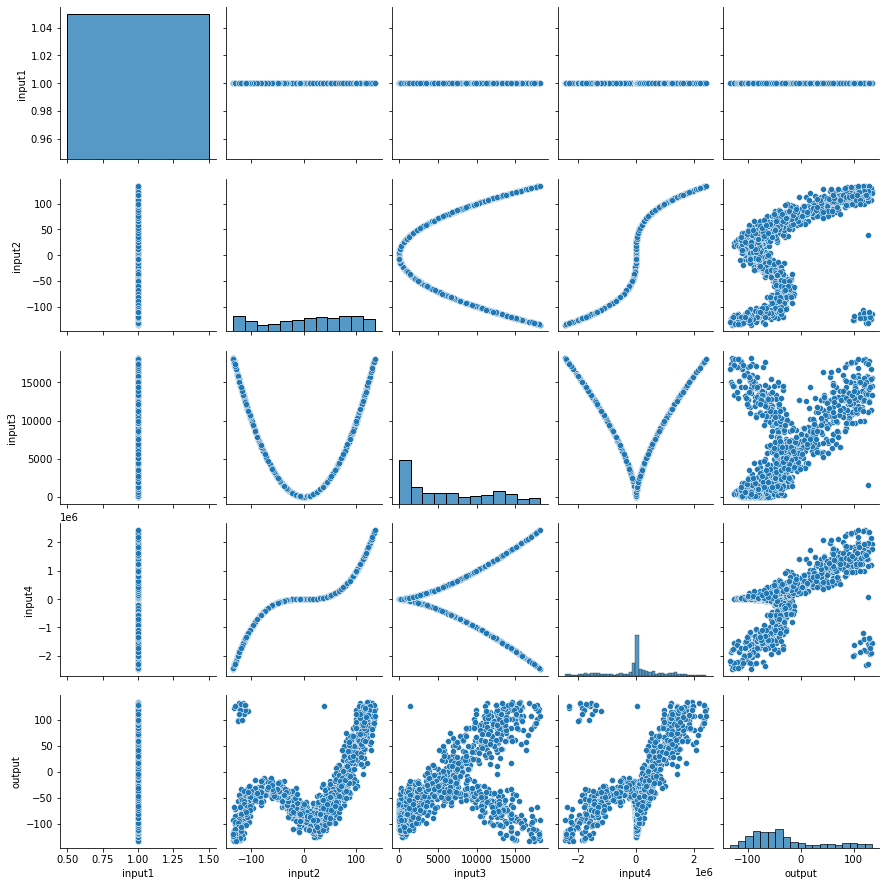

In [132]:
sns.pairplot(transformed_df)